In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [43]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
#linear regression

In [44]:

data = pd.read_csv('~/Desktop/NSE-TATAGLOBAL11.csv')
data['Date'] = pd.to_datetime(data.Date,format='%Y-%m-%d')
data.index = data['Date']


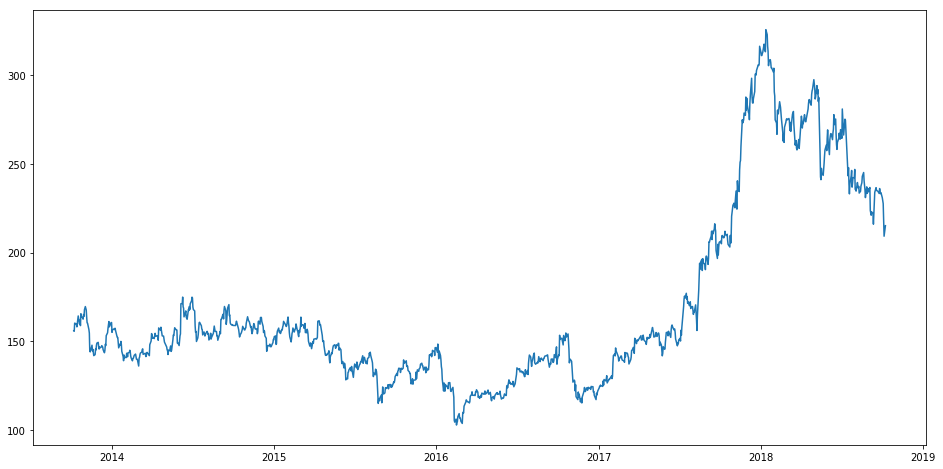

In [45]:
plt.figure(figsize=(16,8))
plt.plot(data['Close'], label='Close Price history')


In [46]:
data = data.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(data)), columns=['Date', 'Close']) #Initialise new dataframe

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]


In [47]:
for i in range(0,len(new_data)):
    new_data['Year'] = str(new_data['Date'][0])[0:4]
    new_data['Month'] = str(new_data['Date'][0])[6:7]
    new_data['mon_fri'] = 0

In [48]:
new_data.drop("Date",axis=1,inplace=True)

In [49]:
new_data.head()

,Close,Year,Month,mon_fri
0,155.8,2013,0,0
1,155.55,2013,0,0
2,160.15,2013,0,0
3,160.05,2013,0,0
4,159.45,2013,0,0


In [50]:
train = new_data[:950] 
test = new_data[950:]

x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_test = test.drop('Close', axis=1)
y_test = test['Close']

In [51]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
preds = model.predict(x_test) 

In [52]:
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
print(rms)

116.80742812492596


In [53]:
preds.std()

0.0

C:\Users\Rohit Sehwag\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Rohit Sehwag\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


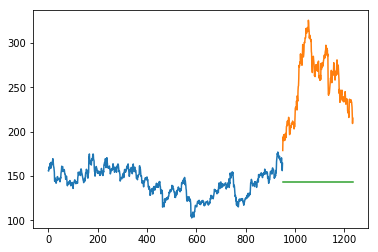

In [54]:
test['Predictions'] = 0
test['Predictions'] = preds

test.index = new_data[950:].index
train.index = new_data[:950].index

plt.plot(train['Close'])
plt.plot(test[['Close', 'Predictions']])


In [ ]:
# Average Method

In [55]:
data = data.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(data)),columns=['Date', 'Close'])

In [56]:
for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

In [57]:
train = new_data[:950]
valid = new_data[950:]

In [58]:
new_data.shape, train.shape, valid.shape

((1235, 2), (950, 2), (285, 2))

In [59]:
train['Date'].min(), train['Date'].max(), valid['Date'].min(), valid['Date'].max()


(Timestamp('2013-10-08 00:00:00'),
 Timestamp('2017-08-11 00:00:00'),
 Timestamp('2017-08-14 00:00:00'),
 Timestamp('2018-10-08 00:00:00'))

In [60]:
preds = []
for i in range(0,285):
    a = train['Close'][len(train)-248+i:].sum() + sum(preds)
    b = a/248
    preds.append(b)

C:\Users\Rohit Sehwag\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Rohit Sehwag\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


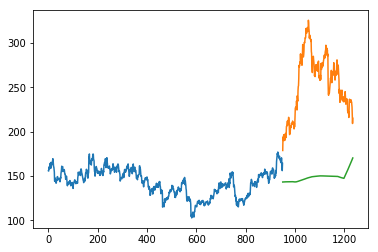

In [61]:
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

In [62]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
rms

111.19583735431382

# Result 

RMS Error with Linear Regression is 116.8074 <br>
RMS Error with Average Method is 111.1958
